<a href="https://colab.research.google.com/github/playbase/DataScience/blob/main/CNN_with_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
pip install opencv-python

In [ ]:
#Reading and Rendering an Image

In [ ]:
import cv2
import pandas as pd
import io

In [ ]:


from google.colab import files

uploaded = files.upload()

In [ ]:
A=cv2.imread('Example_3.jpg')

In [ ]:
A

array([[[255, 255, 255],
        [253, 253, 253],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt

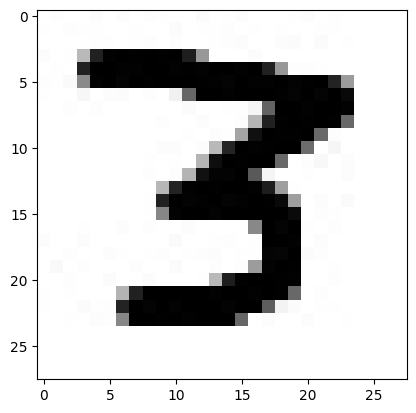

In [ ]:
plt.imshow(A)

In [ ]:
#Data Collection

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Image Visualisation

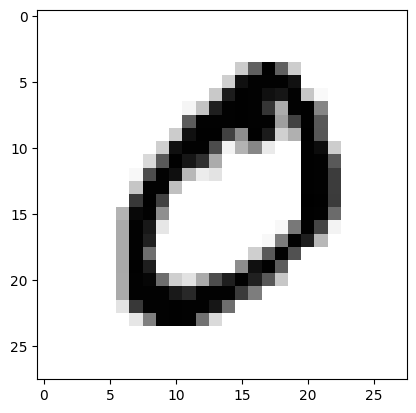

In [ ]:
plt.imshow(x_train[1],plt.get_cmap('binary'))

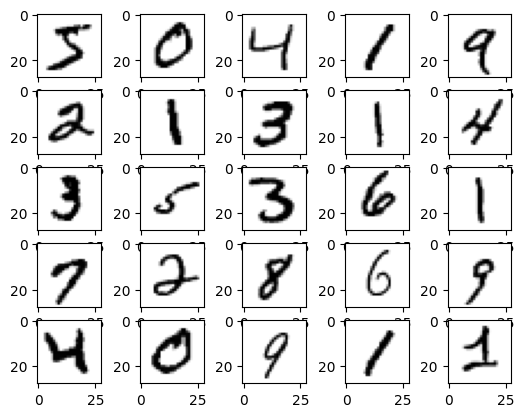

In [ ]:
x=1
for i in range(25):
    plt.subplot(5,5,x)
    plt.imshow(x_train[i],plt.get_cmap('binary'))
    x+=1

In [ ]:
#Start Processing

In [ ]:
#Scaling
x_train=x_train/255
x_test=x_test/255

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [ ]:
#Build Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Convolution2D,MaxPooling2D,Flatten

In [ ]:
nn=Sequential()

In [ ]:
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Flatten())

nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000))

nn.add(Dense(10,activation='softmax'))

In [ ]:
#Compile
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Add Callbacks
from keras.callbacks import EarlyStopping
Early=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
#Fit the model


In [ ]:
hist=nn.fit(x_train,y_train1,validation_split=0.2,callbacks=[Early],epochs=5)

Epoch 1/5
1500/1500 [==============================] - 31s 11ms/step - loss: 0.6185 - accuracy: 0.7984 - val_loss: 0.1739 - val_accuracy: 0.9433
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3606 - accuracy: 0.8891 - val_loss: 0.1472 - val_accuracy: 0.9576
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2950 - accuracy: 0.9097 - val_loss: 0.1076 - val_accuracy: 0.9682
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2610 - accuracy: 0.9191 - val_loss: 0.1042 - val_accuracy: 0.9667
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2473 - accuracy: 0.9246 - val_loss: 0.1123 - val_accuracy: 0.9668


In [ ]:
#Visulaise the result
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [ ]:
# Evaluation Of Training data

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
import numpy as np